## Logistic Regression

#### sparse representation

We create a vocabulary with all words and then represent as sentence as a vector with ones for words that appear in the sentence and 0 for the rest [1,1,1,1,1,1,0,0,...,0,0]. Each word is repersented one time.

#### feature extraction

Positive and negative counts.

Take positive/negative sentences and sreate vocabulary from them. Then for each word in vocabulary assign the number of times it appears in the sentences. 

`I am happy because I am learning NLP. I am happy`

`I am sad, I am not learning NLP. I am sad`

V=[I,am,happy,because,learning,NLP,sad,not]

positive_ferq=[3,3,2,1,1,1,0,0]

negative_ferq=[3,3,0,0,1,1,2,1]

Another approach wpuld be to represent a sentence `I am sad, I am not learning NLP` in a 3D space:

$$ X_{m} = [1,\sum_{w}freqs(w,1),\sum_{w}freqs(w,0)] $$

positive_ferq=[3,3,`2`,`1`,1,1,0,0] $$ \sum_{w}freqs(w,1)=8 $$

negative_ferq=[3,3,`0`,`0`,1,1,2,1] $$ \sum_{w}freqs(w,0)=11 $$

$$ X_{m} = [1,8,11] $$

#### preprocessing

The process of eliminating `stop words` asnd `punctuation`:
[and,is,a,at,has,for,of]
[,.:!"']

#### stemming & lowercasing

Changing word to its original version eg. tunung -> tun. This helps to reduce vocabulary.

In [2]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [3]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\pk764\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [4]:
positive_tweets=twitter_samples.strings('positive_tweets.json')
negative_tweets=twitter_samples.strings('negative_tweets.json')

In [5]:
print('positive: ',len(positive_tweets))
print('negative: ',len(negative_tweets))

positive:  5000
negative:  5000


([<matplotlib.patches.Wedge at 0x29918c090a0>,
 [Text(6.735557395310444e-17, 1.1, 'positive'),
  Text(-2.0206672185931328e-16, -1.1, 'negative')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

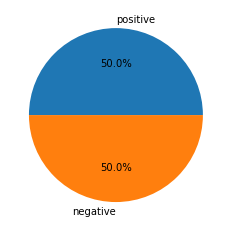

In [6]:
labels=['positive','negative']
tweets=[len(positive_tweets),len(negative_tweets)]
plt.pie(tweets,labels=labels,autopct='%1.1f%%')

In [7]:
print(positive_tweets[100])
print(positive_tweets[101])

@metalgear_jp @Kojima_Hideo I want you're T-shirts ! They are so cool ! :D
@AxeRade haw phela if am not looking like Mom obviously am looking like him :)


#### preprocessing

In [8]:
tweet=positive_tweets[2277]
tweet

'My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i'

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pk764\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [37]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [40]:
print(tweet)
print(tweet2)
#remove hyperlinks
tweet2=re.sub(r'https://[^\s\n\r]+','',tweet2)
print(tweet2)
#remove hashes
tweet2=re.sub(r'#','',tweet2)
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


#### tokenizing

Splitting strings into words without blank spaces.

In [42]:
tokenizer=TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
tweet_tokens=tokenizer.tokenize(tweet2)
print('Tokenized tweet: ',tweet_tokens)

Tokenized tweet:  ['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


#### removing stop words and punctuations

In [45]:
stopwords_english=stopwords.words('english')
print('Stop words: ',stopwords_english)
print('Punctuation: ',string.punctuation)

Stop words:  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [48]:
tweet_clean=[]
for word in tweet_tokens:
    if word not in stopwords_english and word not in string.punctuation:
        tweet_clean.append(word)
    
print(tweet_tokens)
print(tweet_clean)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


#### Stemming

In [49]:
stemmer=PorterStemmer()
tweet_stem=[]
for word in tweet_clean:
    stem_word=stemmer.stem(word)
    tweet_stem.append(stem_word)
print(tweet_clean)
print(tweet_stem)

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


#### task

In [1]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import string
from nltk.corpus import twitter_samples
import re

In [2]:
positive_tweets=twitter_samples.strings('positive_tweets.json')
tweet=positive_tweets[2277]

In [3]:
def process_tweet(tweet):
    tokenizer=TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
    stopwords_english=stopwords.words('english')
    stemmer=PorterStemmer()
    
    tweet=re.sub(r'https://[^\s\n\r]+','',tweet)
    tweet=re.sub(r'#','',tweet)
    tweet_tokenized=tokenizer.tokenize(tweet)
    
    tweet_clean=[]
    for word in tweet_tokenized:
        if word not in stopwords_english and word not in string.punctuation:
            tweet_clean.append(word)
    
    tweet_stem=[]
    for word in tweet_clean:
        stem_word=stemmer.stem(word)
        tweet_stem.append(stem_word)
    
    return tweet_stem

In [4]:
tweet_stem=process_tweet(tweet)
print(tweet_stem)

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
